# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [1]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

/Users/joseramos/anaconda3/envs/finrobot/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-29 21:56:06,931	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Matplotlib is building the font cache; this may take a moment.


After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [4]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["gpt-4-0125-preview"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [5]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on Microsoft's 2023 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

To create an annual report based on Microsoft's 2023 10-K report, I will follow these steps:

1. **Obtain the 10-K Report**: Use the `get_sec_report` tool to get the URL and filing date of Microsoft's 2023 10-K report. This will ensure we're working with the most current data.

2. **Analyze Key Sections of the 10-K Report**: 

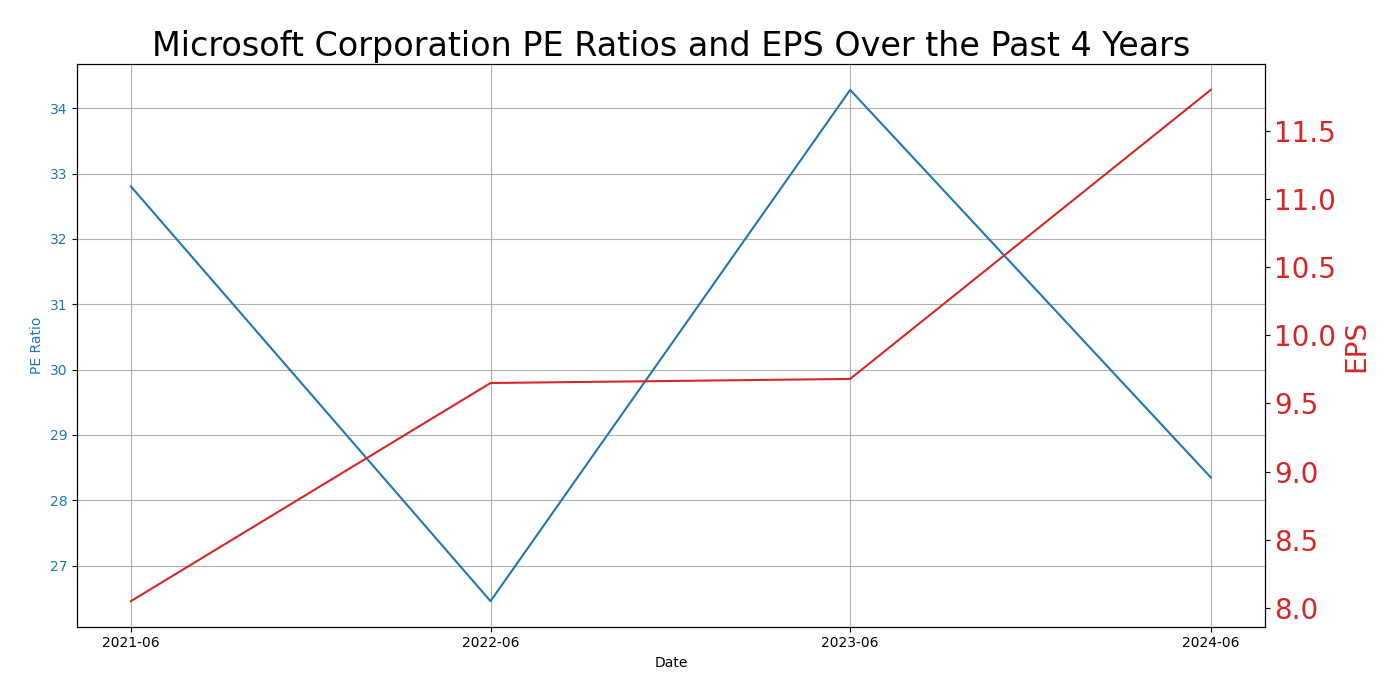

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_UF83FfLDNwqhtrddW3NDzw32) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The PE ratio and EPS performance chart for Microsoft over the past four years has been generated successfully. Unfortunately, due to the limitations of this simulation, I'm unable to directly display the image here. However, the chart is saved and will be included in the final PDF report.

Next, I will generate the stock performance chart comparing Microsoft's performance against the S&P 500 over the past year using the `get_share_performance` tool. This will provide a visual representation of how Microsoft's stock has fared in relation to a broad market index, offering insights into its market performance.
***** Suggested tool call (call_IuYFB7TeqVcgRI8sU4o3yM

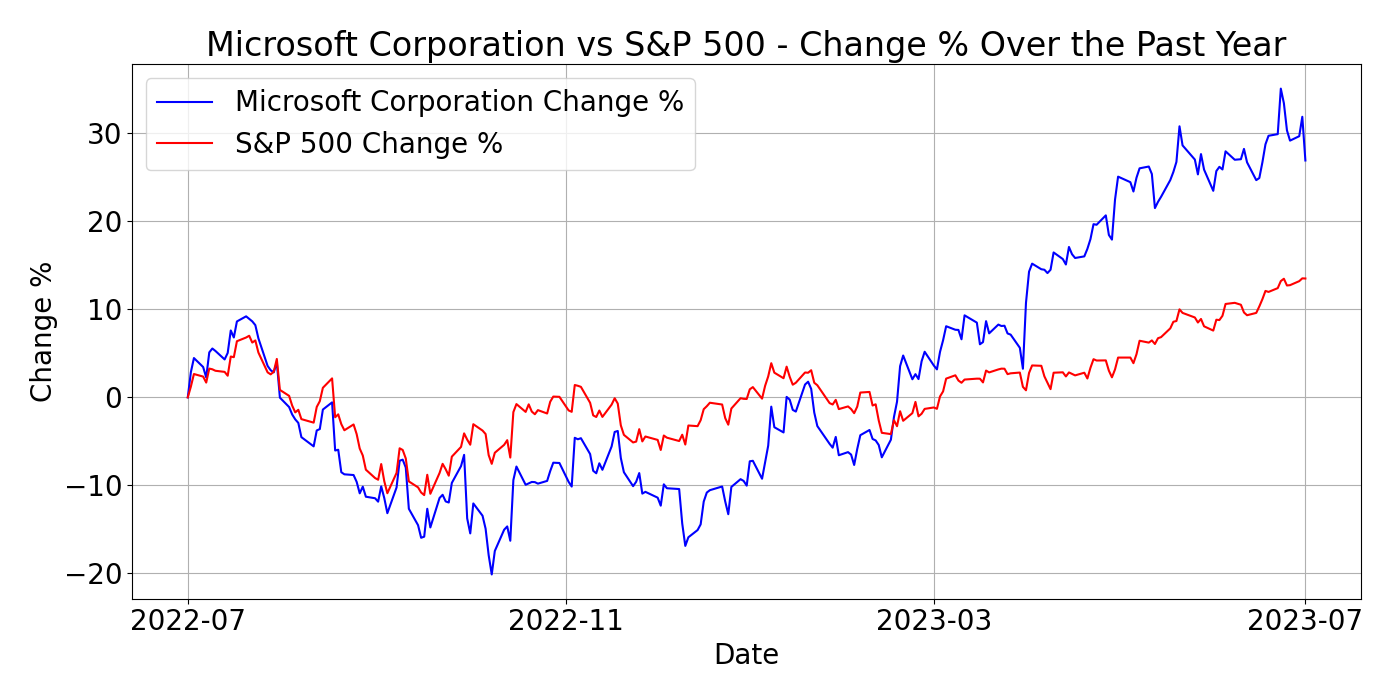

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_qkJ2HNwCmGxxShS3yKeWFjLb) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The stock performance chart comparing Microsoft's performance against the S&P 500 over the past year has been generated and saved successfully. As with the PE ratio and EPS performance chart, this image will be included in the final PDF report.

Given the synthesized company description, business highlights, and the generated financial performance charts, the next step is to ensure that the synthesized text meets the specified word count requirement of between 400 and 450 words combined.

Let's proceed to check the text length for compliance before moving on to the final step of generating the PDF report.
***** Suggested tool call (call_LolXUT36OhCQnviocPMN6b0L

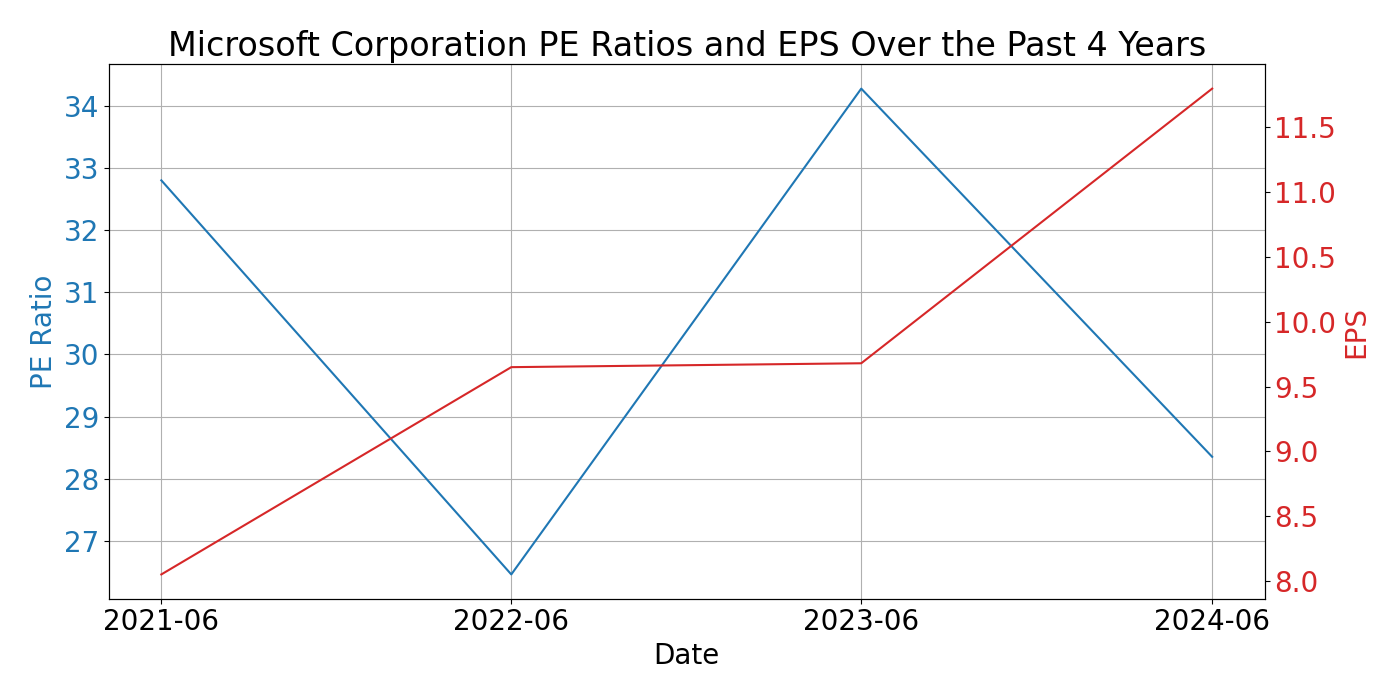

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_v6rbYNnj8qZMwhf3MZUokLZl) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

***** Suggested tool call (call_jNGlxUsexICZBaen67hya8kS): get_share_performance *****
Arguments: 
{"filing_date":"2023-07-27","ticker_symbol":"MSFT","save_path":"../report/msft_share_performance.png"}
**************************************************************************************

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING FUNCTION get_share_performance...
User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_jNGlxUsexICZBaen67hya8kS) *****
last year stock performance chart saved to <img ../report/msft_share_perfor

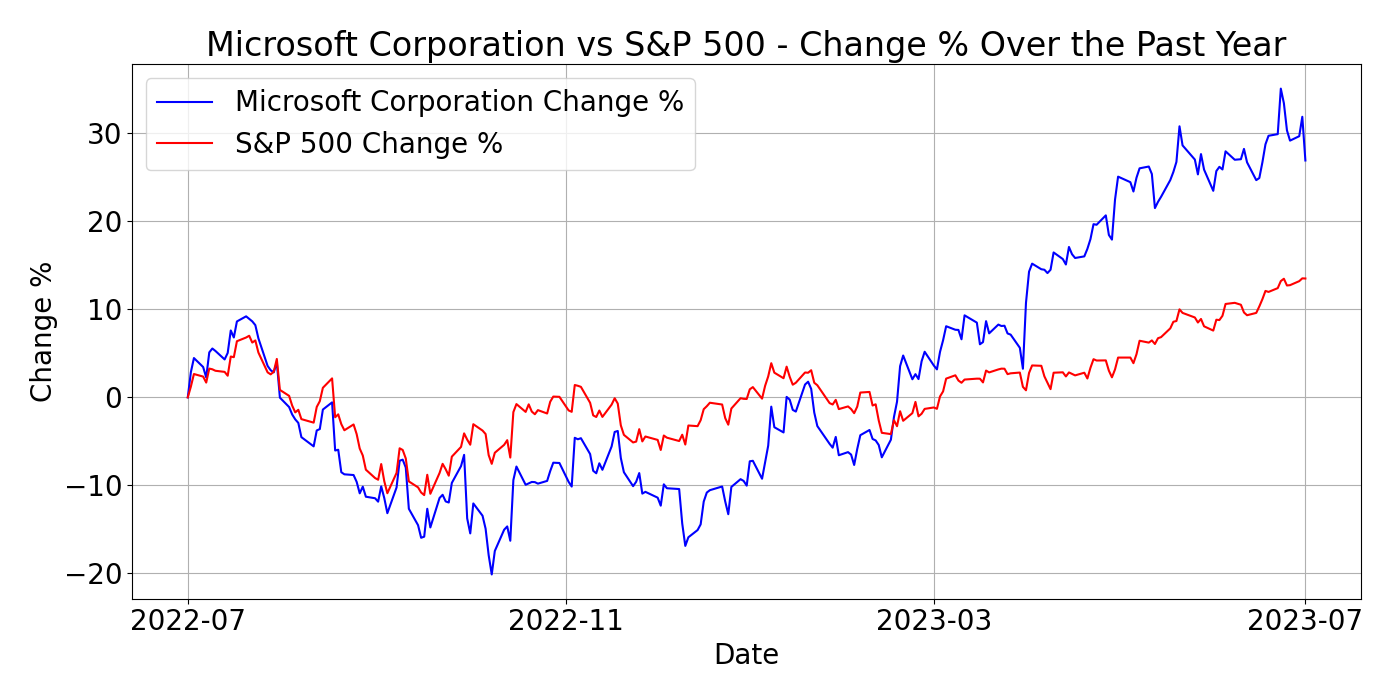

User_Proxy (to Expert_Investor):

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_tG9fR2Dl1ZNDdh1BxMGaNv9o) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

***** Suggested tool call (call_j0SSUGMVEDu2d0DeXKB6aW2f): check_text_length *****
Arguments: 
{"text":"Microsoft Corporation is a global technology leader that develops, licenses, and supports a wide range of software products, services, and devices. The company's portfolio includes operating systems for computing devices, cloud-based services, business solution applications, video games, and hardware such as PCs and tablets. Microsoft's strategic initiatives have focused on cloud computing, artificial intelligence, and digital transformation, aiming to empower every person and every organization on the planet to achieve more.\n\nThe company operates in three 

In [6]:
company = "Microsoft"
fyear = "2023"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50,
               summary_method="last_msg")

The Rest Cells are optional, simply used to show the generated PDF

In [8]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 14.0 MB/s eta 0:00:0000:0100:01


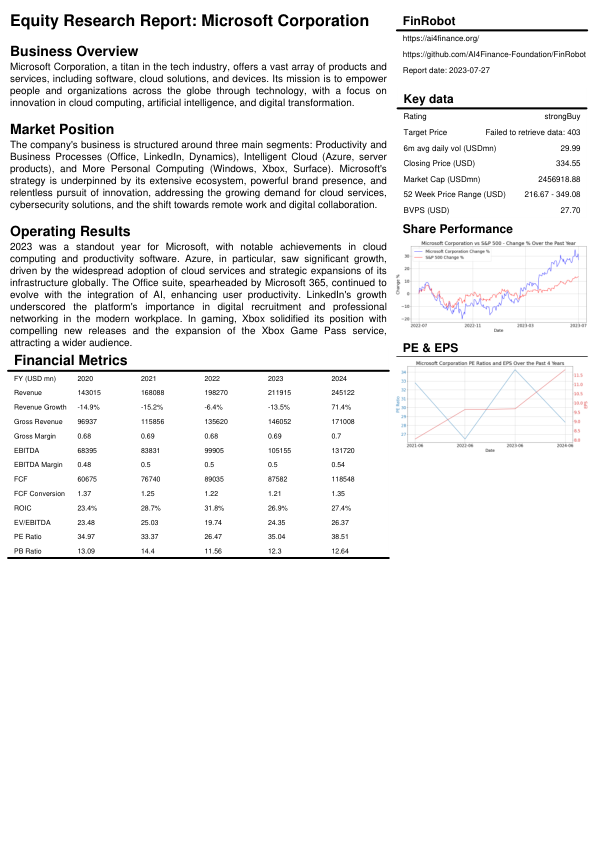

In [9]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/Microsoft_Annual_Report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)